# Tarefa de Agrupamento (*clustering*)


## $k$-means

O algoritmo $k$-means procura por um número predeterminado de grupos (*clusters*) em um conjunto de dados multidimensionais não rotulados. Isso é feito usando uma concepção simples da aparência do cluster ideal:

* O "centro do cluster" é a média aritmética de todos os pontos pertencentes ao cluster.
* Cada ponto está mais próximo de seu próprio centro de cluster do que de outros centros de cluster.

A figura a seguir ([fonte](http://shabal.in/visuals/kmeans/2.html)) ilustra o comportamento do $k$-means durante a formação dos grupos 
![alt text](http://shabal.in/visuals/kmeans/left.gif)

### Classe sklearn.cluster.KMeans

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

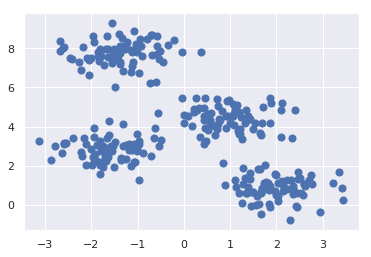

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

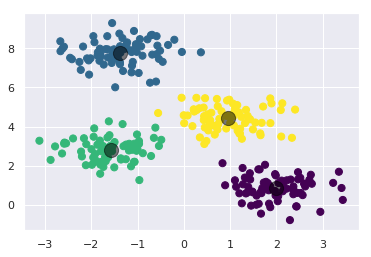

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Classe MiniBatchKMeans

a classe sklearn.cluster.MiniBatchKMeans implementa uma variante do $k$-means mais eficiente, porém menos precisa. Essa variante itera entre duas etapas, semelhante ao k-means clãssico. Na primeira etapa, $b$ amostras são coletadas aleatoriamente do conjunto de dados, para formar um mini-lote. Estes são então atribuídos ao centróide mais próximo. Na segunda etapa, os centróides são atualizados. Ao contrário do k-means, essa segunda etapa é realizada por amostra. Para cada amostra no minilote, o centróide atribuído é atualizado. Essas etapas são executadas até que a convergência ou um número predeterminado de iterações seja alcançado.

O MiniBatchKMeans converge mais rápido que o KMeans, mas a qualidade dos resultados é reduzida. Na prática, essa diferença de qualidade pode ser bem pequena, como ilustra o experimento da figura abaixo ([fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)).

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_mini_batch_kmeans_001.png)



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

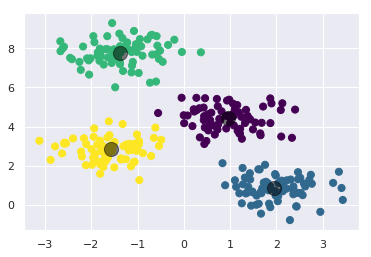

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Limitações

O k-means funciona adequadamente quando os grupos:
* São esféricos
* Bem separados
* Possuem volumes similares
* Possuem quantidades similares de pontos


In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

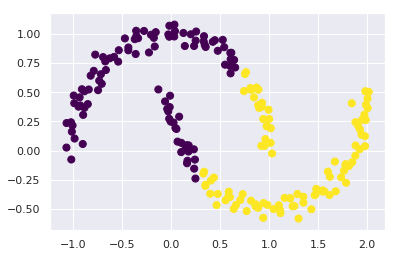

In [0]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Análise da silhueta

A análise de silhueta (*silhouette analysis*) pode ser usada para estudar a distância de separação entre os clusters resultantes. O gráfico de silhueta exibe uma medida de quão perto cada ponto em um cluster está dos pontos nos clusters vizinhos e, portanto, fornece uma maneira visual de avaliar parâmetros como o número de clusters. Essa medida tem um intervalo de [-1, 1].

* coeficientes de silhueta próximos a +1 indicam que a amostra está longe dos clusters vizinhos. 
* um valor 0 indica que a amostra está dentro ou muito perto do limite de decisão entre dois clusters vizinhos
* valores negativos indicam que essas amostras podem ter sido atribuídas ao cluster errado.

No Scikit-Learn, a função [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) calcula o coeficiente médio da silhueta de todas as amostras de um conjunto de dados.

O coeficiente de silhueta para uma amostra é calculado usando a distância intra-cluster média ($a$) e a distância média do cluster mais próximo ($b$) para cada amostra, de acordo com a fórmula a seguir:

$$
\frac{b - a}{\max(a, b)} 
$$

Na expressão acima, $b$ é a distância entre a amostra e o cluster mais próximo do qual a amostra não faz parte. O coeficiente da silhueta é definido apenas se o número de grupos $k$ tal que $2 \leq k \leq \text{n_samples} - 1$.

Valores do coeficiente variam entre 1 e -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.

No exemplo de código a seguir ([fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)) , a análise de silhueta é usada para escolher um valor ideal para n_clusters. O gráfico da silhueta mostra que o valor n_clusters de 3, 5 e 6 é uma má escolha para os dados fornecidos devido à presença de clusters com pontuações abaixo da média da silhueta e também devido a grandes flutuações no tamanho dos gráficos da silhueta. A análise de silhueta é mais ambivalente na decisão entre 2 e 4.

Também a partir da espessura do gráfico da silhueta, o tamanho do cluster pode ser visualizado. O gráfico de silhueta para o cluster 0, quando n_clusters é igual a 2, é maior em tamanho devido ao agrupamento dos 3 subclusters em um grande cluster. No entanto, quando n_clusters é igual a 4, todos os gráficos têm mais ou menos espessura semelhante e, portanto, têm tamanhos semelhantes, como também pode ser verificado no gráfico de dispersão rotulado à direita.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


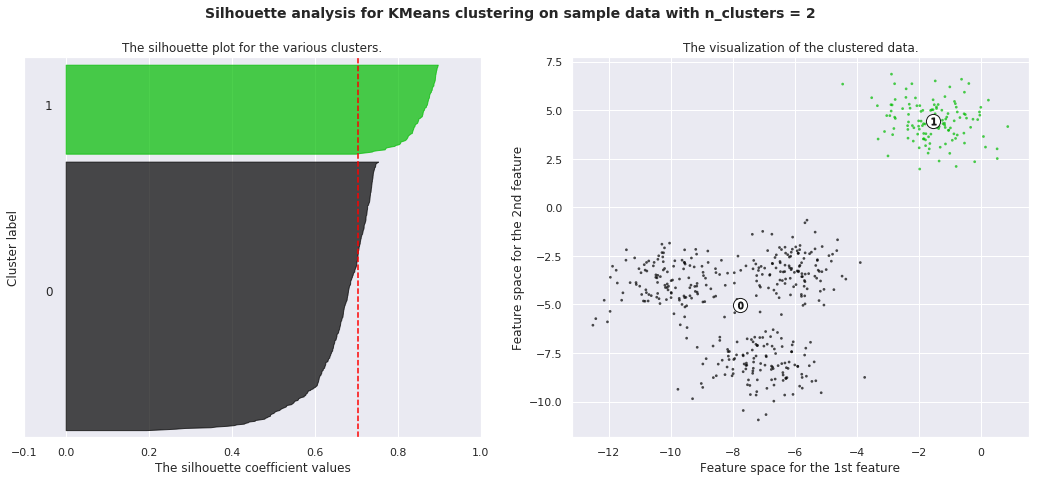

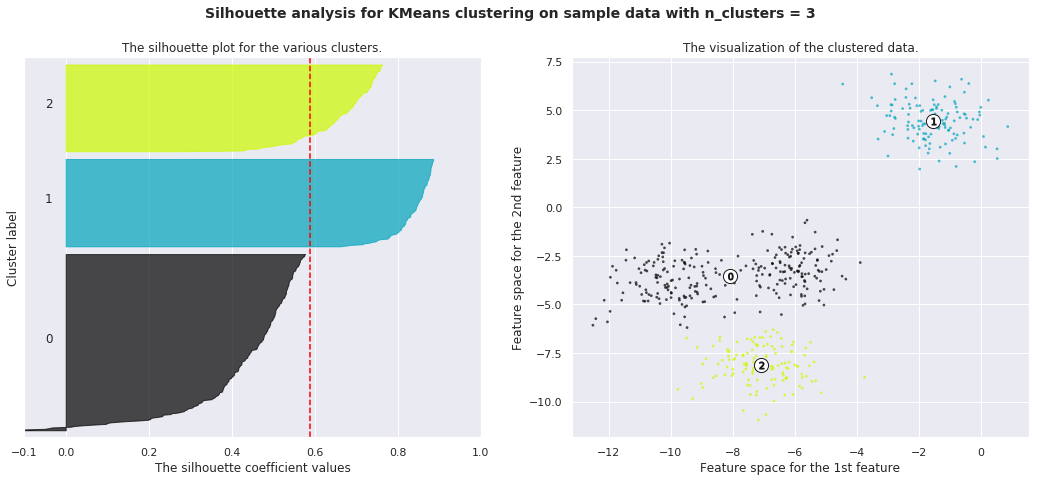

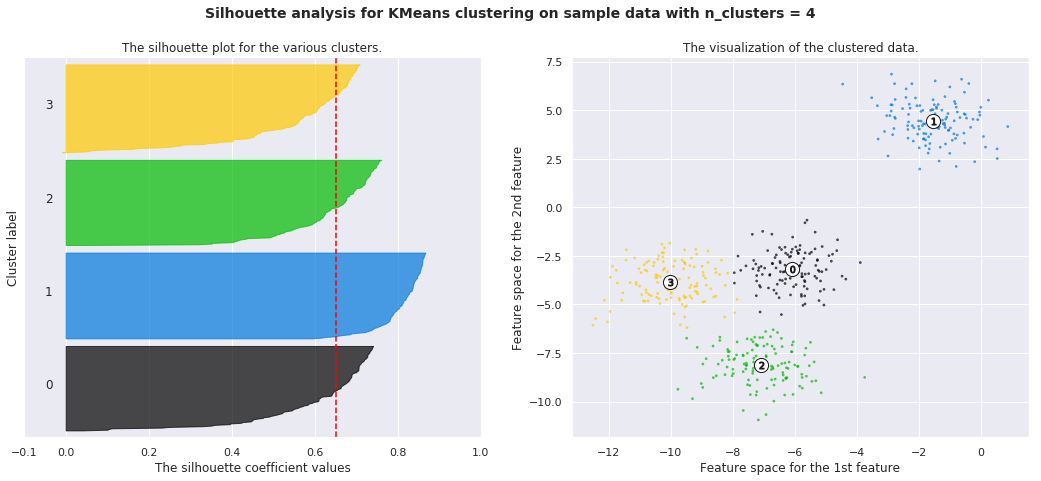

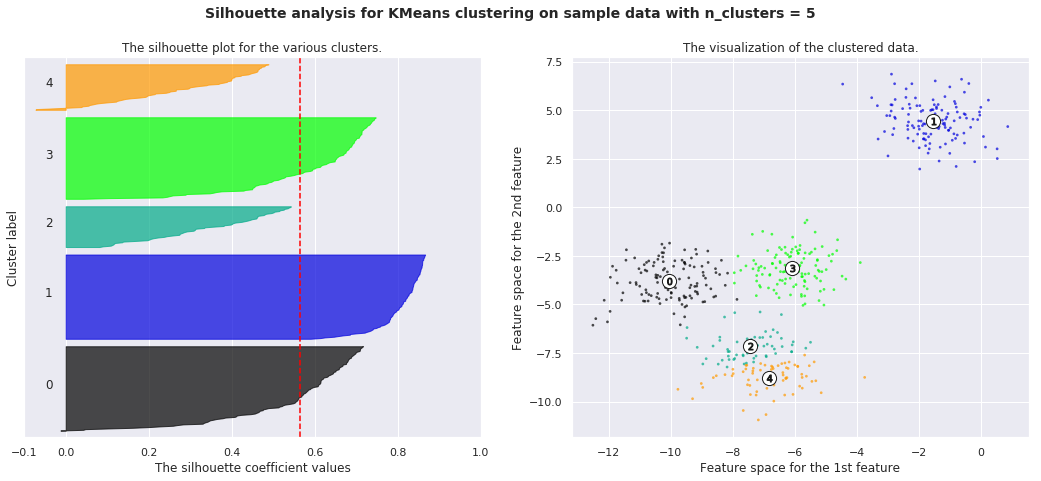

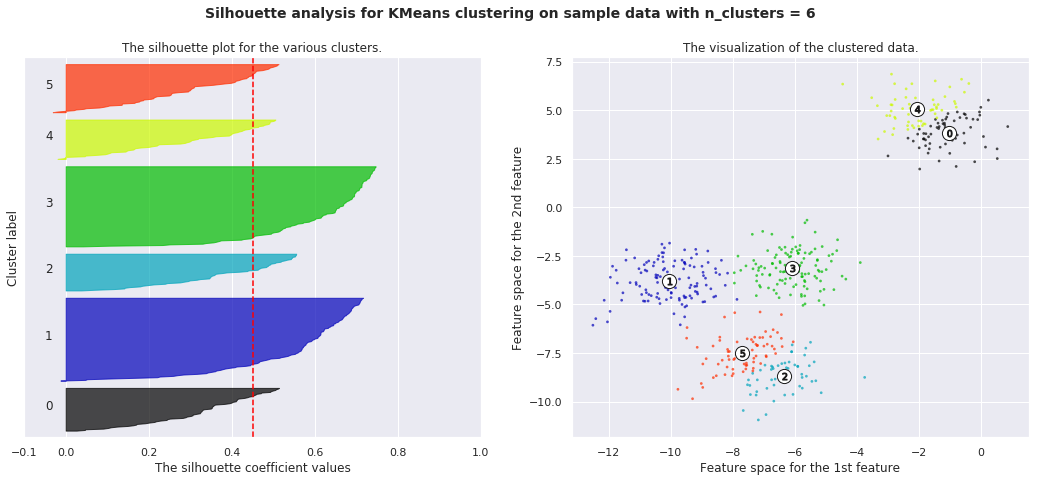

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Hierarchical Agglomerative Clustering

Para gerar um agrupamento, o HAC funciona de forma iterativa. De início, cada ponto é considerado um grupo. A seguir, em cada iteração, esse algoritmo mescla recursivamente o par de grupos que aumenta minimamente uma determinada distância de ligação (*linkage distance*).

### Dendrogramas

O algoritmo HAC gera um agrupamento na forma de um dendrograma. Um dendrograma é uma estrutura em árvore, na qual cada nó representa um grupo. Desta forma, um grupo pode conter outros grupos como componentes. A figura a seguir ([fonte](https://app.displayr.com/Try/Template%20Hierarchical%20Cluster%20Analysis)) apresenta um exemplo ilustrativo de um dendrograma.

![alt text](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/What-is-a-Dendrogram.png)

No exemplo acima, podemos ver que os objetos E e F são muito semelhantes, pois a altura da ligação que os une é a menor. Os próximos dois objetos mais semelhantes são A e B. É também possível inferir do a grande diferença entre os clusters está entre os grupos {A, B} {C, D, E, F}.

{'color_list': ['g', 'r', 'b'],
 'dcoord': [[0.0, 0.14142135623730953, 0.14142135623730953, 0.0],
  [0.0, 0.14142135623730964, 0.14142135623730964, 0.0],
  [0.14142135623730953,
   1.4142135623730951,
   1.4142135623730951,
   0.14142135623730964]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3]}

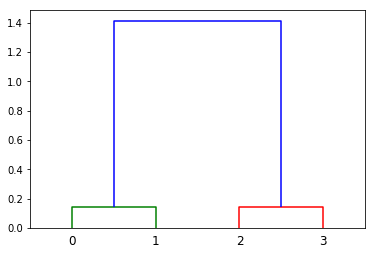

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = [[0., 0.], [0.1, -0.1], [1., 1.], [1.1, 1.1]]

Z = linkage(data)

dendrogram(Z)  

### Classe AgglomerativeClustering

A classe [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) implementa o algoritmo HAC no Scikit-Learn. O valor do parâmetro `linkage` define o critério de ligação. Seus valores são: {"ward" (padrão), "complete", "average", "unique"}. O critério de ligação determina qual medida usar para medir a distância entre dois grupos. O algoritmo HAC mescla os pares de grupos que minimizam esse critério.

* 'ward' minimiza a variância dos grupos que estão sendo mesclados.
* 'complete' ou máxima usa as distâncias máximas entre todas os pontos dos dois conjuntos.
* 'average' usa a média das distâncias de cada ponto dos dois conjuntos.
* 'single' usa o mínimo das distâncias entre todas os pontos dos dois conjuntos.

O exemplo a seguir ([fonte](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)) ilustra o uso da classe 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')
[1 1 1 0 0 0]


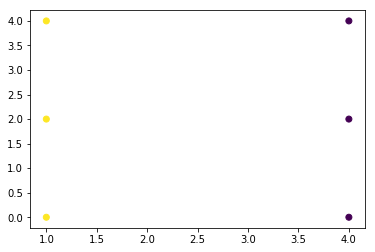

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], 
              [1, 4], 
              [1, 0],
              [4, 2], 
              [4, 4], 
              [4, 0]])
clustering = AgglomerativeClustering().fit(X)
print(clustering)
print(clustering.labels_)

cluster = clustering.labels_
plt.scatter(X[:,0], X[:,1], c = cluster)

No exemplo a seguir, o número de grupos é definido como 2 usando o parâmetro `n_clusters`, enquanto que o parâmetro `affinity` é definido como "euclidian" (ou seja, distância euclidianda entre os pontos será usada). Finalmente, o parâmetro de ligação `linkage` é definido como "ward", o que minimiza a variância entre os grupos que são mesclados.

In [128]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

O código a seguir ([fonte](https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py)) constrói um dendrograma a partir dos exemplos do conjunto de dados Iris.

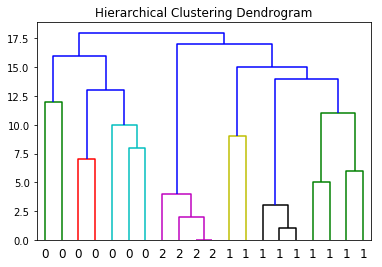

In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()


## DBSCAN

O algoritmo DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) captura a percepção de que um cluster é um conjunto denso de pontos espacialmente próximos. A idéia é que, se um ponto específico pertencer a um cluster, ele deve estar próximo a muitos outros pontos nesse mesmo cluster.

O DBSCAN possui dois (hiper)parâmetros:
* $\epsilon \in \Re$
* minPoints $\in Z$ 

No início de sua execução, o DBSCAN seleciona aleatoriamente um ponto $p$ do conjunto de dados. Se houver mais do que minPoints pontos a uma distância até epsilon de $p$ (incluindo o próprio ponto original), o DBSCAN considera todos eles como parte de um "cluster". Em seguida, esse cluster é expandido verificando todos os novos pontos e verificando se eles também têm mais de pontos minPoints a uma distância de epsilon, aumentando o cluster de forma recursiva.

Eventualmente, não haverá mais pontos para adicionar ao cluster. Nesse momento, o DBSCAN escolhe um novo ponto arbitrário e repete o processo. 

Pode acontecer de o ponto $p$ selecionado ter menos que pontos minPoints em sua "bola" de raio épsilon e também não faça parte de nenhum outro cluster. Se for esse o caso, $p$ é considerado um "ponto de ruído" que não pertence a nenhum cluster.

O link a seguir ilustra de forma visual o comportamento do DBSCAN durante a execução: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

[fonte](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


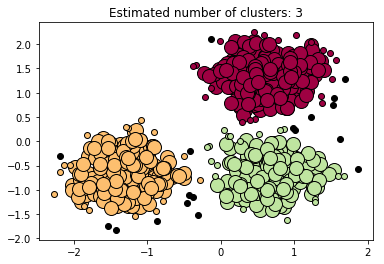

In [0]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

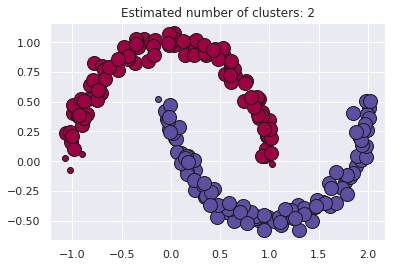

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Medidas de avaliação (externas e internas)

Geralmente, as medidae de avaliação de agrupamentos podem ser categorizadas:

* Validação interna, que usa as informações internas do processo de clustering para avaliar a qualidade de uma estrutura de clustering sem referência a informações externas. 
* Validação externa, que consiste em comparar os resultados de uma análise de cluster com um resultado conhecido, como rótulos de classe fornecidos externamente. Esse tipo de medida mede até que ponto os rótulos de cluster correspondem aos rótulos de classe fornecidos externamente.

### Índice Rand ajustado

Dados o conhecimento das atribuições verdadeiras da classe no parâmetros labels_true e as atribuições do algoritmo de agrupamento das mesmas amostras labels_pred, o índice Rand ajustado (*adjusted rand index*, ARI) é uma função que mede a semelhança das duas atribuições, ignorando permutações e com a normalização do acaso.

As principais características dessa medida são as seguintes:

* As atribuições de etiqueta aleatórias (uniformes) têm uma pontuação no ARI próxima de 0,0 para qualquer valor de n_clusters e n_samples.
* Intervalo limitado [-1, 1]: valores negativos indicam agrupamentos ruins, agrupamentos consistente com o rotulamento padrão têm um ARI positivo; 1,0 é a pontuação de correspondência perfeita.
* Nenhuma suposição é feita sobre a estrutura do cluster; consequentemente essa medida pode ser usada para comparar diferentes  algoritmos de agrupamento.

In [126]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)  

0.24242424242424246

In [0]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_rand_score(labels_true, labels_pred) 

Um agrupamento ruim produz um valor negativo ou próximo de zero dessa medida.

In [127]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)  

-0.12903225806451613

### Homogeneidade

Métrica de homogeneidade de uma rotulagem de cluster, tomando como base um rotulamento padrão (*ground truth*).

Um agrupamento satisfaz tem alta homogeneidade se todos os seus clusters contiverem apenas pontos de dados que são membros de uma única classe.

Essa métrica é independente dos valores absolutos dos rótulos: uma permutação dos valores dos rótulos de classe ou cluster não altera o valor da pontuação de forma alguma.

No Scikit-Learn, a função [homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) implementa a medida de homogeneidade. Essa função produz uma valor entre 0.0 e 1.0, sendo que este último corresponde a um agrupamento maximamente consistente com o rotulamento padrão.

Um rotulação completamente consistente com o rotulamento padrão tem homogeneidade máxima:

In [122]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

As rotulações não perfeitas que dividem ainda mais as classes em mais clusters podem ser perfeitamente homogêneas:

In [123]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000000
1.000000


Clusters que incluem exemplos de diferentes classes não oferecem uma rotulação homogênea:

In [124]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000000
0.000000


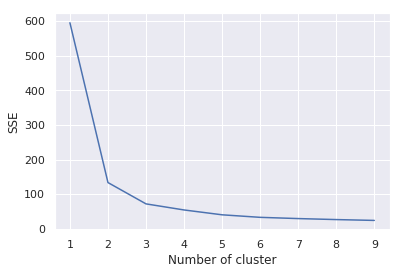

In [125]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Aprendizado de Comitês (*Emsemble Learning*)

Comitês são abordagens para combinar várias técnicas de aprendizado supervisionado para construir um único modelo preditivo. Comitês são aplicáveis às tarefas de classificação e de regressão.

Durante o treinamento de um comitê, o objetivo é construir uma coleção de preditores que, juntos, produzem uma predição melhor do que cada um separadamente.


Para ilustrar o funcionamento de modelos comitês, considere a figura abaixo ([fonte](https://)). Nessa figura, temos duas árvores de decisão induzidas. Considere que o problema de classificação (binária) a ser resolvido é predizer ser determinado indivíduo irá gostar (ou não) de um determinado jogo de vídeogames. Para cada um dos indíviduos testados, cada árvore produz um escore (pontuação) juntamente com a classe prevista. O que um modelo comitê faz é combinar os resultados de cada modelo componente para produzir a predição final.

![alt text](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/twocart.png)


Normalmente, o modelo de comitê resultante tem qualidade preditiva melhor porque diminui a variância ou o viés quando comparado aos modelos componentes (do comitê).

Conforme ilustra a figura a seguir ([fonte](https://ieeexplore.ieee.org/document/1688199)), a fronteira de decisão correspondente a um modelo de comitê pode ser aproximada por meio de uma combinação apropriada dos diferentes preditores (classificadores ou regressores) componentes.

![alt text](https://www.researchgate.net/profile/Robi_Polikar/publication/3432431/figure/fig1/AS:670045000695819@1536762585849/Combining-classifiers-that-are-trained-on-different-subsets-of-the-training-data_W640.jpg)

Um objetivo importante a ser alcançado durante o treinamento de modelo de comitê é atingir a diversidade, no sentido de que cada modelo componente possa complementar um eventual mal desempenho (em termos de qualidade preditiva) dos demais componentes em alguma região do espaço de atributos. Algumas abordagens para se obter diversidade são as seguintes:

* Usar diferentes parâmetros de treinamento para a mesma família de classificadores;

* Usar diferentes tipos de algoritmos de ML para treinar cada modelo componente;

* Usar diferentes conjuntos de atributos para treinar cada modelo componente;

* Manipular o conjunto de treinamento para treinar cada modelo componente com um conjunto de treinamento distinto dos usados nos demais componentes (essa é a abordagem mais comum).

Há duas famílias de algoritmos par aaprendizado de modelos de comitês:

* Bagging
* Boosting

### Bagging

Bagging (termo proveniente de *bootstrap aggregation*) é uma abordagem baseada em comitê que produz $T$ modelos preditivos e combina os resultados desses $T$ modelos para realizar predição para um dado exemplo.

Dado um conjunto de treinamento $X$ com $m$ exemplos, a técnica de bagging funciona de modo iterativo para construir o modelo comitê. Para iteração $t$ ($1 \leq t \leq T$), um conjunto de treinamento de treinamento $X_t$ de tamanho $m$ é gerado a partir de $X$, por meio de um processo conhecido como *amostragem com reposição* (*sampling with replacement*). Cada conjunto de treinamento $X_t$ é denominado uma *amostra de inicialização* (*bootstrap sample*). Dessa forma, a diversidade é obtida no bagging com o uso de diferentes subconjuntos de dados aleatoriamente criados com reposição a partir do único conjunto de dados original.

Repare que, porque a amostragem com reposição é utilizada para produzir cada $X_t$, alguns exemplos em cada conjunto de treinamento gerado podem ocorrer mais de uma vez, enquanto que outras intâncias podem não ser selecionadas para compor $X_t$. 

Para cada $X_t$, um modelo de predição é ajustado. Cada conjunto $X_t$ (*bootstrap sample*) é usado para treinar um classificador do mesmo tipo. No contexto da tarefa de classificação, para predizer a classe de uma instância $\mathbf{x}$, cada modelo $M_t$ é usado para produzir uma resposta. O modelo comitê (composto de todos os $M_t$ classificadores, produz como resposta a classe majoritariamente produzida pelos seus componentes. 
  
O bagging também pode ser aplicado à tarefa de regressão (i.e., para realizar previsão de valores contínuos), batando para isso que produza o valor médio das previsões produzidas pelos $T$ modelos base.

Vantagens do Bagging:
* Possibilidade de treinamento em paralelo: cada modelo componente pode ser construído de forma independente.

* Adequado quando o algoritmo de ML utilizado gera modelos componentes de baixo viés e de alta variância (i.e., modelos complexos).

#### Passos

Os passos a seguir resumem a técnica de geração do modelo de comitê por meio da técnica *bagging*:

* Seja $m = |X|$ (quantidade de exemplos de treinamento)

* Para cada iteração $t$:

  * Gerar uma bootstrap sample $X_t$ de tamanho $m$.
  
  * Aplicar o algoritmo de aprendizado sobre $X_t$ para gerar o modelo de predição $M_t$

  * Armazenar o modelo resultante

Predição (classificação) para $\mathbf{x}$:

* Para cada um dos $T$ modelos:

  * Predizer a classe do exemplo $\mathbf{x}$ usando $M_t$

  * Retornar a classe que foi prevista mais vezes (*voting*)

#### Florestas Aleatórias (*Random Forests*)

Random Forests é um caso particular de bagging. Aqui também selecionamos amostras de bootstrap do conjunto de treinamento. No entanto, também são amostrados subconjuntos aleatórios de atributos (*features*) para treinar as árvores individuais. No bagging genérico, um conjunto de dados com todos os atributos contidos em $X$ seria usado para ajustar cada árvore de decisão.

Devido à seleção aleatória de atributos, as árvores são mais independentes (i.e., diferentes) umas das outras do que no bagging, o que contribui para aumentar a diversidade dos modelos componentes.

Efeitos (quando comparamos ao bagging): 

* melhor desempenho preditivo; 
* mais rápido, porque cada árvore aprende a partir de um subconjunto próprio do conjunto de todos os atributos.

In [0]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [0]:
clf.predict([[3, 5, 4, 2]])

array([2])

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.477748
petal length (cm)    0.423225
sepal length (cm)    0.079228
sepal width (cm)     0.019798
dtype: float64

No handles with labels found to put in legend.


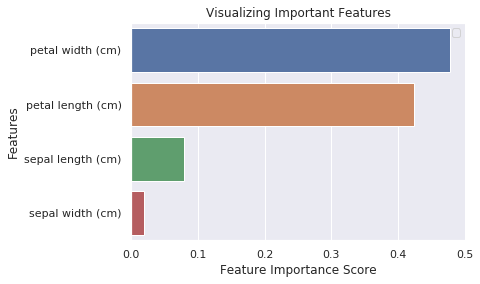

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Classe BaggingClassifier

In [0]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

rng = 42

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=rng)

# create the classifier
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 4, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 40}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Boosting

Na técnica de boosting, o treinamento do modelo comitê é realizado de forma sequencial: em cada passo, o algoritmo tenta adicionar um novo modelo componente que é melhor em regiões (do espaço de atributo) nas quais os modelos anteriormente adicionados ao comitê erraram.
Algoritmos de boosting são adequados para algoritmos que produzem modelos de viés alto e de baixa variância.


### Aprendizes: fracos e fortes

Um **aprendiz fraco** (*weak learner*) é definido como um classificador que é apenas ligeiramente correlacionado com a classificação verdadeira. Ou seja, um aprendiz fraco pode rotular exemplos com acurácia igual a $1/2 + \alpha$, onde $\alpha$ é um valor pequeno e positivo. Isso significa que em um weak learner, o desempenho em qualquer conjunto de treinamento é ligeiramente melhor que a previsão ao acaso.

Em contraste, um **aprendiz forte** (*strong learner*) é um classificador que é arbitrariamente bem correlacionado com a classificação verdadeira.


### AdaBoost

O AdaBoost é uma das primeiros métodos de boosting. Este método mantém uma lista de pesos, um para cada um dos $m$ exemplos do conjunto de treinamento.

1. Iniciar pesos com valores uniformes ($1/m$)
2. Iterar:
  * Aplicar aprendiz $L$ aos exemplos ponderados
  * Aumentar pesos dos exemplos classificados incorretamente por $L$.
3. Combinar modelos por votação ponderada

Em cada iteração (passo 2 acima), os pesos dos exemplos são alterados de tal forma a fazer com que o próximo aprendiz priorize os exemplos que o aprendiz anterior classificou incorretamente.


In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
# Realiza a carga do dados
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [0]:
# Define as matrizes de dados e alvo
X = dataset[:,0:8]
y = dataset[:,8]
print(X.shape)

(768, 8)


In [0]:
# Divide os dados para treinamento e teste
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)  

print(clf.feature_importances_ )

y_pred = clf.predict(X)

print(confusion_matrix(y, y_pred))

[0.06 0.23 0.06 0.04 0.11 0.16 0.26 0.08]
[[445  55]
 [ 69 199]]


### Gradient boosting

A abordagem mais popular de boosting é o Gradient Boosting. Outros nomes para este mesmo método: *multiple additive regression trees*, *stochastic gradient boosting*, *gradient boosting machines*.

### XGBoost

O [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (*Extreme Gradient Boosting*) é a implementação de gradient boosting mais utilizada atualmente. Essa implementação foi desenvolvida por Tianqi Chen.

O modelo que o XGBoost produz é um comitê em que cada componente é uma árvore de decisão. Sendo assim, a representação usada no modelo resultante no XGBoost é a mesma usada no método *Random Forests*. A diferença está na forma pela qual o comitê de árvores é construído durante o aprendizado. O XGBoost define uma função objetivo é a otimiza durante o aprendizado, por meio do método *Gradient Descent*. 

Suponha que $f_t$ ($1 \leq t \leq T$) representa uma das $T$ árvores componentes de um modelo comitê produzido pelo XGBoost. Cada árvore é um elemento do conjunto $\mathcal{F}$, o espaço de árvores compatíveis com o conjunto de treinamento utilizado, $f_t \in \mathcal{F}$. O escore produzido pelo comitê de árvores é dado pela fórmula a seguir:

$$
\hat{y}^{(i)} = \sum_{k=1}^T f_t(x^{(i)})
$$

Durante o aprendizado, o XGBoost procura minimizar a seguinte função objetivo:

$$
\text{obj} = \sum_{t=1}^m l(y^{(i)}, \hat{y}^{(i)}) + \sum_{i=1}^T\Omega(f_t)
$$

Otimizar todas as árvores do comitê de uma única vez é intratável computacionalmente. Por conta disso é que o XGBoost usa um procecimento de otmização aditivo, no qual ocorre a otimização de uma árvore por vez.
$$
\begin{split}
\hat{y}_0^{(i)} &= 0\\
\hat{y}_1^{(i)} &= f_1(x^{(i)}) = \hat{y}_0^{(i)} + f_1(x^{(i)})\\
\hat{y}_2^{(i)} &= f_1(x^{(i)}) + f_2(x^{(i)})= \hat{y}_1^{(i)} + f_2(x^{(i)})\\
&\dots\\
\hat{y}_t^{(i)} &= \sum_{k=1}^t f_k(x^{(i)})= \hat{y}_{t-1}^{(i)} + f_t(x^{(i)})
\end{split}
$$

É possível provar (veja detalhes no artigo fonte) que a função objetivo a ser otimizada para selecionar t-ésima árvore é a seguinte:

$$
\operatorname{obj}_t = \sum_{i=1}^m [g_i f_t(x^{(i)}) + \frac{1}{2} h_i f_t^2(x^{(i)})] + \Omega(f_t)
$$

Na expressão acima, $g_i e $h_i$ são derivadas parciais e primeira e de segunda ordem.

$$
\begin{split}
g_i &= \partial_{\hat{y}^{(t)}_{t-1}} l(y^{(i)}, \hat{y}^{(i)}_{t-1})\\
h_i &= \partial_{\hat{y}^{(i)}_{t-1}}^2 l(y^{(i)}, \hat{y}^{(i)}_{t-1})
\end{split}
$$

O Scikit-Learn fornece classes empacotadoras para utilizar a implementação fornecida pelo XGBoost: XGBClassifier e XGBRegressor.

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
# Realiza a carga do dados
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [0]:
# Define as matrizes de dados e alvo
X = dataset[:,0:8]
y = dataset[:,8]

In [0]:
# Divide os dados para treinamento e teste
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
# Ajusta o modelo
model = XGBClassifier()
print(model)
model.fit(X_train, 
          y_train, 
          eval_metric = "logloss", 
          verbose = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Avalia a acurária do modelo preditivo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


#### Outros exemplos

[fonte](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)

##### Regressão

O exemplo a seguir ilustra o uso do XGBoost para a tarefa de regressão.

In [0]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [0]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

36.271203581682585


In [0]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

##### Classificação binária

In [0]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[212   0]
 [  0 357]]


##### Classificação multiclasses

In [0]:
wine = load_wine()

X = wine.data
y = wine.target

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


##### Validação cruzada

In [0]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

Scores: [55.30444573 55.59151472 63.44642064 57.82986083 58.71808276]
Mean: 58.178
Std: 2.937



## Bagging x Boosting
* Bagging  e Random Forests são algoritmos que visam reduzir a complexidade de modelos que se sobreajustam aos dados de treinamento. 
** Bagging pode degradar o desempenho de algoritmos estáveis (por exemplo, k-NN), porque conjuntos de treinamento efetivamente menores são usados para treinar cada classificador.
* Em contraste, boosting é uma abordagem para aumentar a complexidade de modelos que sofrem de alto viés, i.e., que se subajustam aos dados de treinamento.
